# Matrices: Column View

We can also think of matrices as a collection of vectors

\begin{equation}
\begin{bmatrix}
\begin{array}{rr{\qquad}1}
\pmb{c_1} &
\pmb{c_2} 
\end{array}
\end{bmatrix}
\pmb{x} =
\pmb{b}
\end{equation}

In this view, we can think of finding the vector $\pmb{x}$ consisting of the scalars $x_1$ and $x_2$ such that the weighted addition of the two vectors (columns of the matrix) on the LHS equals the vector on the RHS:

\begin{equation}
x_1\begin{bmatrix}
\begin{array}{r{\quad}1}
2\\ 4
\end{array}
\end{bmatrix} 
+ x_2
\begin{bmatrix}
\begin{array}{r{\quad}1}
4\\ 11
\end{array}
\end{bmatrix}=
\begin{bmatrix}
\begin{array}{r{\quad}1}
2 \\ 1
\end{array}
\end{bmatrix}
\end{equation}

In [ ]:
%matplotlib inline

In [1]:
import sys
sys.path.append("..")
from myla.plotting import *

### in matrix...
* rows - patients
* colume - features

## Column View of Matrices

We can think of this problem from a different perspective: from the perspective of the columns of \textbf{A}. 

In this view, we can think of finding the scalars $x_1$ and $x_2$ such that the weighted addition of the two vectors (columns of the matrix) on the LHS equals the vector on the RHS:

\begin{equation}
x_1\begin{bmatrix}
\begin{array}{r{\quad}1}
2\\ 4
\end{array}
\end{bmatrix} 
+ x_2
\begin{bmatrix}
\begin{array}{r{\quad}1}
4\\ 11
\end{array}
\end{bmatrix}=
\begin{bmatrix}
\begin{array}{r{\quad}1}
2 \\ 1
\end{array}
\end{bmatrix}
\end{equation}

From the previous notebook, we know that the solution to the systems of equations is $(x_1=3,x_2=-1)$. We can add vectors graphically by putting the tail of the second vector on the tip of the first vector. The first vector

\begin{equation}
3\begin{bmatrix}
\begin{array}{r{\quad}1}
2\\ 4
\end{array}
\end{bmatrix} =
\begin{bmatrix}
\begin{array}{r{\quad}1}
6\\ 12
\end{array}
\end{bmatrix}
\end{equation}

is plotted in red and the second vector

\begin{equation}
-1\begin{bmatrix}
\begin{array}{r{\quad}1}
4\\ 11
\end{array}
\end{bmatrix} =
\begin{bmatrix}
\begin{array}{r{\quad}1}
-4\\ -11
\end{array}
\end{bmatrix}
\end{equation}
is plotted in green.

We see that the green vector ends at $(2,1)$ which is the vector on the RHS. This can be verified by explicitly plotting the RHS vector in blue.

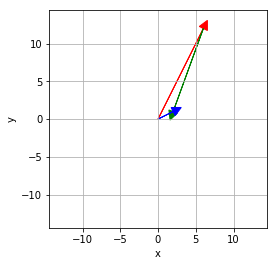

In [2]:
draw_vectors(((0,0),(6,12),'r'),
             ((6,12),(-4,-11),'g'),
             ((0,0),(2,1),'b'))

## Problem 

Representing a Matrix `M` as a list of columns, write a function that multiplies a vector `v` by a matrix `m`.

Note that the Python representing of `m` will look like rows even though they are columns.

```Python
m = ((2,4),(4,11))
```

In [3]:
from myla.becvector import *
from myla.representing_vectors import *

In [4]:
def print_matrix(m, width=7):
    for row in range(len(m[0])):                     
        print("|",
              " ".join([("%5.2f"%m[col][row]).ljust(width) for col in range(len(m))]),
             "|")

In [5]:
print_matrix([(2,4),(4,11)])

|  2.00    4.00   |
|  4.00   11.00   |


In [33]:
def m_x_v(m,v):
    assert len(v) == len(m)
    rslt = zero(len(m[0]))
    for i in range(len(m)):
        col = m[i]
        col2 = alpha_x_v(v[i], col)
        rslt = v_plus_v(rslt, col2)
    return rslt


In [36]:
def m_x_v2(m,v):
    assert len(v) == len(m)
    rslt = zero(len(m[0]))
    for col, alpha in zip(m,v):
        print(col)
        print(alpha)
        print("*"*20)
        col2 = alpha_x_v(alpha, col)
        rslt = v_plus_v(rslt,col2)
    return rslt



In [37]:
help(zip)

Help on class zip in module builtins:

class zip(object)
 |  zip(iter1 [,iter2 [...]]) --> zip object
 |  
 |  Return a zip object whose .__next__() method returns a tuple where
 |  the i-th element comes from the i-th iterable argument.  The .__next__()
 |  method continues until the shortest iterable in the argument sequence
 |  is exhausted and then it raises StopIteration.
 |  
 |  Methods defined here:
 |  
 |  __getattribute__(self, name, /)
 |      Return getattr(self, name).
 |  
 |  __iter__(self, /)
 |      Implement iter(self).
 |  
 |  __next__(self, /)
 |      Implement next(self).
 |  
 |  __reduce__(...)
 |      Return state information for pickling.
 |  
 |  ----------------------------------------------------------------------
 |  Static methods defined here:
 |  
 |  __new__(*args, **kwargs) from builtins.type
 |      Create and return a new object.  See help(type) for accurate signature.



In [35]:

print_vector(m_x_v2(([1,2,3],[4,3,1]),[1,3]))

[1, 2, 3]
1
********************
[4, 3, 1]
3
********************
| 13.00   |
| 11.00   |
|  6.00   |


In [38]:
print_vector(m_x_v(((2,4),(4,11)), (3,-1)))

|  2.00   |
|  1.00   |


In [40]:
print_matrix([[1,2,3],[4,3,1]])

|  1.00    4.00   |
|  2.00    3.00   |
|  3.00    1.00   |


## Example: Rotation in the 2D Plane

A rotation around the origin in the 2D plane by an angle $\phi$ can be described by the matrix

\begin{equation}
\pmb{R}_{\phi} = 
\begin{bmatrix}
\begin{array}{rr{\qquad}1}
\cos \phi & -\sin \phi \\
\sin \phi & \cos \phi 
\end{array}
\end{bmatrix}
\end{equation}

* Write a program `get_rot` that takes as an argument an angle expressed in either degrees or radians and returns the 
corresponding rotation matrix. The function should have a keyword argument indicating whether the angle is
in degrees or radian. 

* Write a program `rotate_vec` that takes as arguments a 2D vector and an angle and returns the rotated vector.

* Write a vector `v` and an angle `phi` and returns the angle `v` rotated by the angle `phi`.

#### Hints 
* How is `phi` expressed? In Python how are `cos` and `sin` computed?


In [51]:
import math
def get_rot(phi, units="degrees"):
    if units.lower()[0] == "d":
        phi = math.pi * phi / 180
    rot_mat = [[math.cos(phi), math.sin(phi)], [-math.sin(phi), math.cos(phi)]]
    return rot_mat
def rotate_vec(v,phi, units="degrees"):
    return m_x_v2(get_rot(phi, units), v)

In [52]:
help(math.sin)

Help on built-in function sin in module math:

sin(x, /)
    Return the sine of x (measured in radians).



In [53]:
print_matrix(get_rot(45))

|  0.71   -0.71   |
|  0.71    0.71   |


[0.7071067811865476, -0.7071067811865475]
1
********************
[0.7071067811865475, 0.7071067811865476]
0
********************


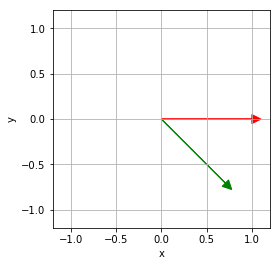

In [54]:
draw_vectors(((1,0),'r'),
             (rotate_vec([1,0],-45),'g'))

## Matrix-Matrix Multiplication

We can also think of matrix-matrix multiplication in a column view manner.

\begin{equation}
\pmb{A}_{m,n} \pmb{B}_{n,p}=\pmb{C}_{m,p}
\end{equation}

$\pmb{A}$ consists of $n$ columns with dimension $m$; $\pmb{B}$ consists of $p$ columns with dimension $n$; the resulting matrix $\pmb{C}$ has $p$ columns of dimension $m$.

Column $i$ in $\pmb{C}$ is the result of multiplying the $i^{\text{th}}$ vector in $\pmb{B}$ by $\pmb{A}$.

\begin{equation}
    \pmb{A}
    \begin{bmatrix}
        \begin{array}{rrrr{\qquad}1}
            \pmb{b}_1 & \pmb{b}_2 & \cdots & \pmb{b}_p
        \end{array}
    \end{bmatrix}
=
    \begin{bmatrix}
        \begin{array}{rrrr{\qquad}1}
            (\pmb{Ab}_1) & (\pmb{Ab}_2) & \cdots & (\pmb{Ab}_p)
        \end{array}
    \end{bmatrix}
\end{equation}
 


In [ ]:
from IPython.display import YouTubeVideo

In [ ]:
YouTubeVideo("FX4C-JpTFgY", start=380, end=608)

## Problem:
#### Looking at a Matrix as a collection of vectors, write a function that computes matrix multiplication column-wise

In [59]:
def m_x_m(A, B):
    return [m_x_v2(A, b) for b in B]

def m_x_m2(A, B):
    assert len(A) == len(B[0])
    rslt = []
    for b in B:
        rslt.append(m_x_v2(A,b))
    return rslt


In [57]:
A = [[11,-15],[-15,29]]
print_matrix(A)

| 11.00   -15.00  |
| -15.00  29.00   |


In [58]:
print_matrix(m_x_m(A,A))

[11, -15]
11
********************
[-15, 29]
-15
********************
[11, -15]
-15
********************
[-15, 29]
29
********************
| 346.00  -600.00 |
| -600.00 1066.00 |
